In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3D Quantum Kicked rotor

- The quantum kicked rotor represents a particle on a ring periodically kicked by a smooth potential. Mathematically, these kicks are modelled as delta functions in time and between the kicks the particle undergoes free-particle time evolution. 
- The quasi-periodic kicked rotor is obtained from the standard kicked rotor by an additional quasi-periodic temporal modulation of the kick strength. The Hamiltonian is written with two additional frequencies as follows:

\begin{align*}
H &= \frac{1}{2M}(p_1 ^2 + p_2^2 + p_3^2) + \widetilde{K}\cos{\theta} \delta _T(t) \\
& = \frac{1}{2M}(P^2) + \widetilde{K}\cos{\theta} \delta _T(t) \\
\end{align*}

where: 
- $\widetilde{K} = K\left[ 1 + \epsilon \cos{(\omega_2t + \phi_2)} \cos{(\omega_3t+ \phi_3)}\right]$
- In the above expression, $(\omega_2 , \omega_3)$ are the two additional frequencies. 
- $\delta_T(t)$ represents the delta function in time with a time-period 'T'

-  Since the quasi-periodic kicked rotor requires only one spatial dimension, it is straightforward to be numerically evaluated while offering the richness of 3d systems. 

In [2]:
def qkr_3d(params:dict, T:int, DIAG:int):
    """3D Quantum kicked rotartor: computes var_p = <p^2> and psi

    Initial state $p[0] = 1$
    Output:
        var_p   : the variance of momentum as
              a function of time
        p   : array with the momentum eigenvalues, 
              in the interval (-T,T), integers
        psi : the wavefunction in momentum representation
              array of shape (N=2T, T/DIAG)
    """
    N = 2*T
    p = np.fft.fftfreq(N, 1.0/N) #compute Discrete Fourier Transform for sample frequencies
    x = np.arange(0, 2*np.pi, 2*np.pi/N)  # compute sample angles between [0,2\pi]
    
    # Initialise wavefunction
    psi = np.zeros((N, T//DIAG + 1), dtype = complex)
    psi_t = np.zeros(N, dtype = complex)
    psi_t[0] = 1
    
    #unpack parameters
    K,M,eps,phi2,phi3,w2,w3 = params.values()
    
    # momentum space time-evolution operator
    Up = np.exp(-1j*p**2/(2*M))
    
    # Initalise momentum-varaince value 
    var_p = np.zeros(T)
    col_no = 1 #miscellaneous
    for t in range(T):
        # compute time-dependent Kick
        Kbar = K*(1+eps*np.cos(w2*t + phi2)*np.cos(w3*t + phi3))
        # position space time-evolution operator
        Ux = np.exp(-1j*Kbar*np.cos(x))
        # compute the wavefunction
        psi_t = np.fft.fft(Ux * np.fft.ifft(Up * psi_t))
        var_p[t] = np.sum(p**2 * abs(psi_t)**2)
        if t%DIAG == 0:
            psi[:,col_no] = psi_t
            col_no += 1
    return var_p/K**2, np.fft.fftshift(p), np.fft.fftshift(psi)

In [3]:
parameters1 = {'K':4,'M':1,'eps':0.1,'phi2':0.2,'phi3':0.3,'w2':np.sqrt(2),'w3':np.sqrt(3)}
no_kicks = 5000

# 3D kicked rotor for K < K_c

- By trial and error found that $K_c$ $\sim$ 5

In [4]:
w,p,psi_p = qkr_3d(parameters1,T=no_kicks, DIAG = 50)

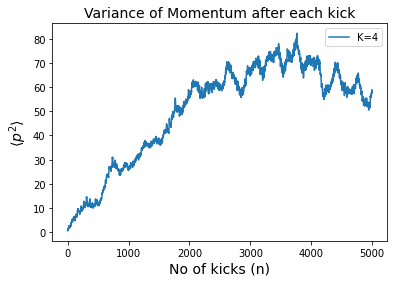

In [5]:
plt.plot(w,label='K=4')
plt.title('Variance of Momentum after each kick',fontsize=14)
plt.xlabel('No of kicks (n)',fontsize=14)
plt.ylabel(r'$\langle p^2 \rangle$',fontsize=14)
plt.legend()
plt.show()

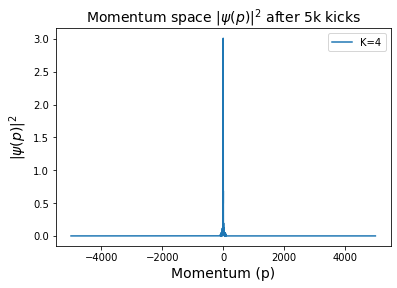

In [6]:
pabs = np.sum(psi_p**2,axis=1)
plt.plot(p,np.abs(pabs),label='K=4')
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$|\psi(p)|^2$',fontsize=14)
plt.title('Momentum space $|\psi (p) |^2$ after 5k kicks',fontsize=14)
plt.legend()
plt.show()

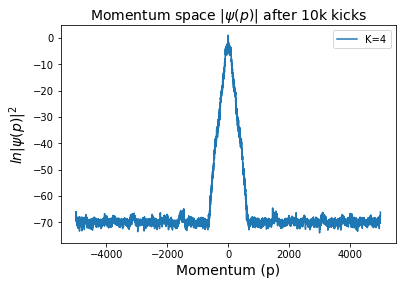

In [7]:
pabs = np.sum(psi_p**2,axis=1)
plt.plot(p,np.log(np.abs(pabs)),label='K=4')
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$ln|\psi(p)|^2$',fontsize=14)
plt.title('Momentum space $|\psi (p) |$ after 10k kicks',fontsize=14)
plt.legend()
plt.show()

# 3D kicked rotor for K > K_c

In [8]:
parameters2 = {'K':6,'M':1,'eps':0.1,'phi2':0.2,'phi3':0.3,'w2':np.sqrt(2),'w3':np.sqrt(3)}

In [9]:
w2,p2,psi_p2 = qkr_3d(parameters2,T=no_kicks, DIAG = 50)

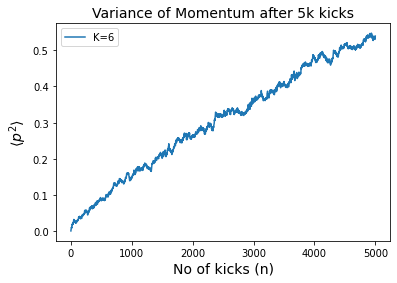

In [10]:
plt.plot(w2/400,label='K=6')
plt.title('Variance of Momentum after 5k kicks',fontsize=14)
plt.xlabel('No of kicks (n)',fontsize=14)
plt.ylabel(r'$\langle p^2 \rangle$',fontsize=14)
plt.legend()
plt.show()

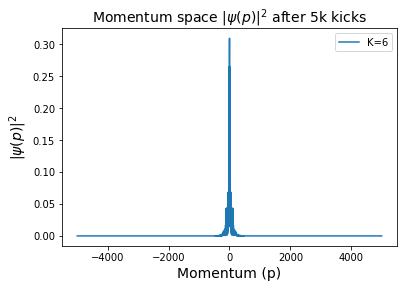

In [11]:
pabs2 = np.sum(psi_p2**2,axis=1)
plt.plot(p2,np.abs(pabs2),label='K=6')
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$|\psi(p)|^2$',fontsize=14)
plt.title('Momentum space $|\psi (p) |^2$ after 5k kicks',fontsize=14)
plt.legend()
plt.show()

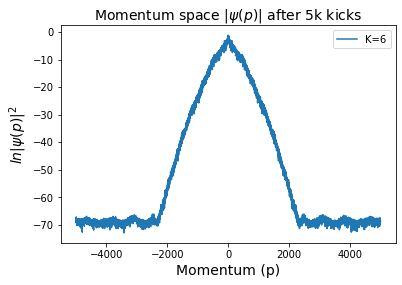

In [12]:
pabs2 = np.sum(psi_p2**2,axis=1)
plt.plot(p2,np.log(np.abs(pabs2)),label='K=6')
plt.xlabel('Momentum (p)',fontsize=14)
plt.ylabel('$ln|\psi(p)|^2$',fontsize=14)
plt.title('Momentum space $|\psi (p) |$ after 5k kicks',fontsize=14)
plt.legend()
plt.show()

# References: 

1. Casati, G., Guarneri, I., & Shepelyansky, D. L. (1989). Anderson Transition in a One-Dimensional System with Three Incommensurate Frequencies. Physical Review Letters, 62(4), 345–348. https://doi.org/10.1103/physrevlett.62.345

2. Wang, J., & García-García, A. M. (2009). Anderson transition in a three-dimensional kicked rotor. Physical Review E, 79(3), 01–10. https://doi.org/10.1103/physreve.79.036206